In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [23]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Load the validation dataset
val_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)



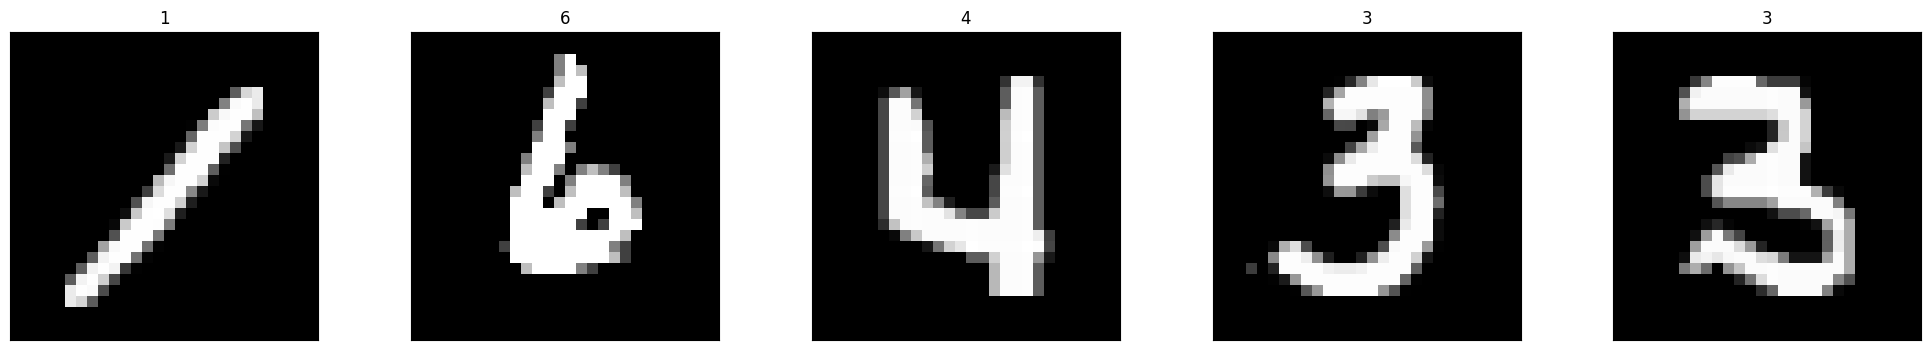

In [8]:
# Show the first 5 images with their labels
images, labels = next(iter(train_loader))

fig = plt.figure(figsize=(25, 4))
for idx in range(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].squeeze(), cmap='gray')
    ax.set_title(str(labels[idx].item()))



In [20]:
# Define the CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # First conv layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # Second conv layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Max pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Flatten layer
        self.flatten = nn.Flatten()
        # Linear layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        # Dropout
        self.dropout = nn.Dropout(0.3)
        # ReLU
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x))) # Convolution 1 and pooling
        x = self.pool(self.relu(self.conv2(x))) # Convolution 2 and pooling
        x = self.flatten(x) # Flatten the output for the linear layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Net()

# Initialize the optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

In [22]:
# Train the network
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        # Forward pass, backward pass, optimize
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
    # Print metrics for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {(100*correct/total):.2f}%')
        

Epoch [1/20], Loss: 0.0607, Accuracy: 98.16%
Epoch [2/20], Loss: 0.0447, Accuracy: 98.66%
Epoch [3/20], Loss: 0.0385, Accuracy: 98.86%
Epoch [4/20], Loss: 0.0320, Accuracy: 99.03%
Epoch [5/20], Loss: 0.0273, Accuracy: 99.17%
Epoch [6/20], Loss: 0.0232, Accuracy: 99.25%
Epoch [7/20], Loss: 0.0227, Accuracy: 99.30%
Epoch [8/20], Loss: 0.0202, Accuracy: 99.34%
Epoch [9/20], Loss: 0.0176, Accuracy: 99.46%
Epoch [10/20], Loss: 0.0154, Accuracy: 99.50%
Epoch [11/20], Loss: 0.0148, Accuracy: 99.52%
Epoch [12/20], Loss: 0.0123, Accuracy: 99.61%
Epoch [13/20], Loss: 0.0133, Accuracy: 99.56%
Epoch [14/20], Loss: 0.0121, Accuracy: 99.60%
Epoch [15/20], Loss: 0.0107, Accuracy: 99.67%
Epoch [16/20], Loss: 0.0109, Accuracy: 99.62%
Epoch [17/20], Loss: 0.0098, Accuracy: 99.68%
Epoch [18/20], Loss: 0.0084, Accuracy: 99.72%
Epoch [19/20], Loss: 0.0106, Accuracy: 99.64%
Epoch [20/20], Loss: 0.0095, Accuracy: 99.67%


In [24]:
# Evaluate the model on the validation dataset
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in val_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on validation data: {accuracy:.2f}%')


Accuracy on validation data: 99.29%


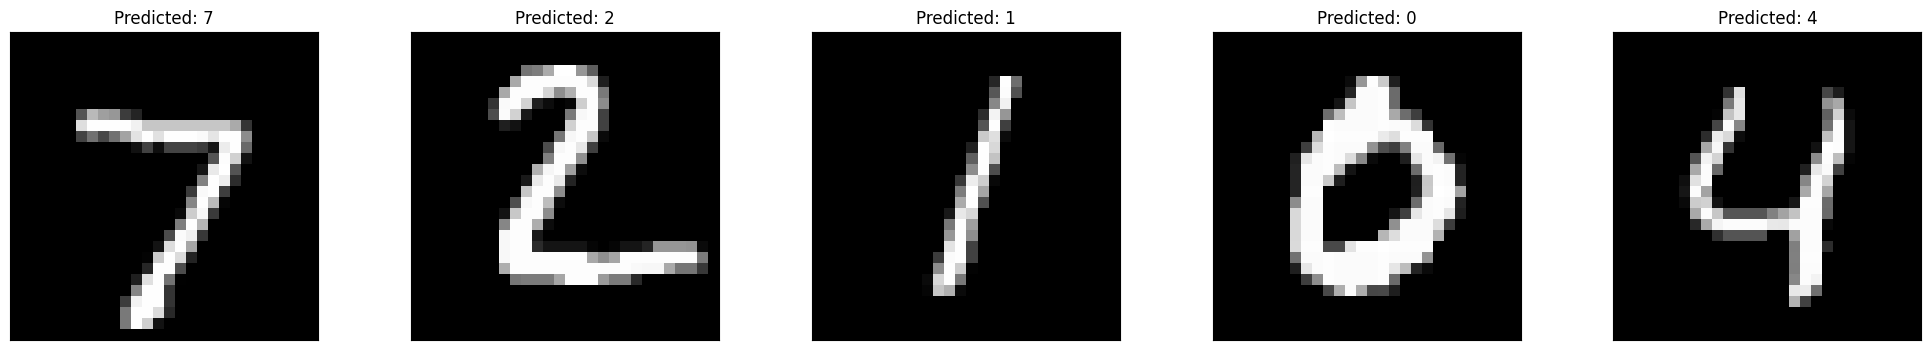

In [25]:
# Set the model to evaluation mode
model.eval()

# Get a batch of images from the validation dataset
images, labels = next(iter(val_loader))

# Make predictions on the batch of images
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Plot the images with their predicted labels
fig = plt.figure(figsize=(25, 4))
for idx in range(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].squeeze(), cmap='gray')
    ax.set_title(f'Predicted: {predicted[idx].item()}')


In [39]:
# Now, fix the parameters, and train an input that gives 5
train_image = torch.randn((1, 28, 28), requires_grad=True)
image_optimizer = optim.Adam([train_image], lr=1e-2)

# Train the input
num_epochs = 100
for epoch in range(num_epochs):
    image_optimizer.zero_grad()
    output = model(train_image.unsqueeze(0))
    loss = criterion(output, torch.tensor([5]))
    loss.backward()
    image_optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 22.4847
Epoch [11/100], Loss: 7.8543
Epoch [21/100], Loss: 0.0821
Epoch [31/100], Loss: 0.0000
Epoch [41/100], Loss: 0.0000
Epoch [51/100], Loss: 0.0000
Epoch [61/100], Loss: 0.0000
Epoch [71/100], Loss: 0.0000
Epoch [81/100], Loss: 0.0000
Epoch [91/100], Loss: 0.0000


Text(0.5, 1.0, 'Predicted: 5, with confidence: 1.00')

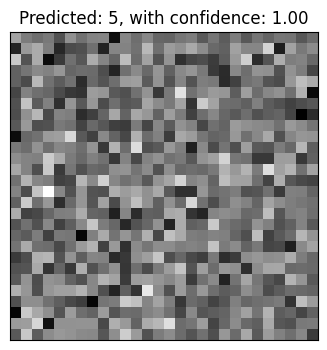

In [49]:
# visualize the input
predicition_class = model(train_image.unsqueeze(0)).argmax().item()
# use softmax to get the confidence
confidence = torch.softmax(model(train_image.unsqueeze(0)), dim=1).max().item()

fig = plt.figure(figsize=(25, 4))
ax = fig.add_subplot(1, 5, 1, xticks=[], yticks=[])
ax.imshow(train_image.detach().numpy().squeeze(), cmap='gray')
ax.set_title(f'Predicted: {predicition_class}, with confidence: {confidence:.2f}')